In [1]:
from memory_profiler import memory_usage
import time
import matplotlib.pyplot as plt
import random

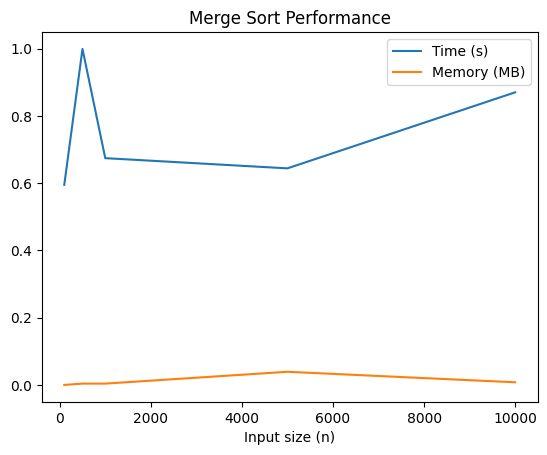

In [3]:
# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Profiling
def profile_merge_sort():
    sizes = [100, 500, 1000, 5000, 10000]
    times = []
    mems = []

    for n in sizes:
        arr = random.sample(range(1, n*10), n)
        
        start = time.time()
        mem = memory_usage((merge_sort, (arr.copy(),)), max_iterations=1, interval=0.01)
        end = time.time()
        
        times.append(end - start)
        mems.append(max(mem) - min(mem))

    plt.plot(sizes, times, label="Time (s)")
    plt.plot(sizes, mems, label="Memory (MB)")
    plt.xlabel("Input size (n)")
    plt.legend()
    plt.title("Merge Sort Performance")
    plt.show()

profile_merge_sort()
